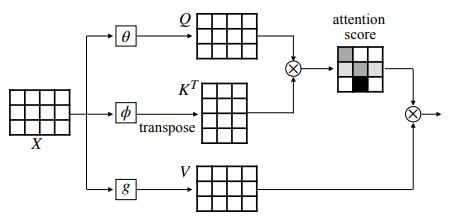

> 1- Compute attention scores.<br>
> 2- Compute attention weights.<br>
> 3- Compute context vectors.<br>

# 1- Compute attention scores

In [13]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

In [14]:
# can compute dot product by using loop , but loops are generally slowe.
# can achieve the same result by using matrix multiplication (@)

atten_scores = inputs @ inputs.T
print(atten_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


# 2- Compute attention weights.

In [15]:
atten_weights = torch.softmax(atten_scores,dim=1)
print(atten_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


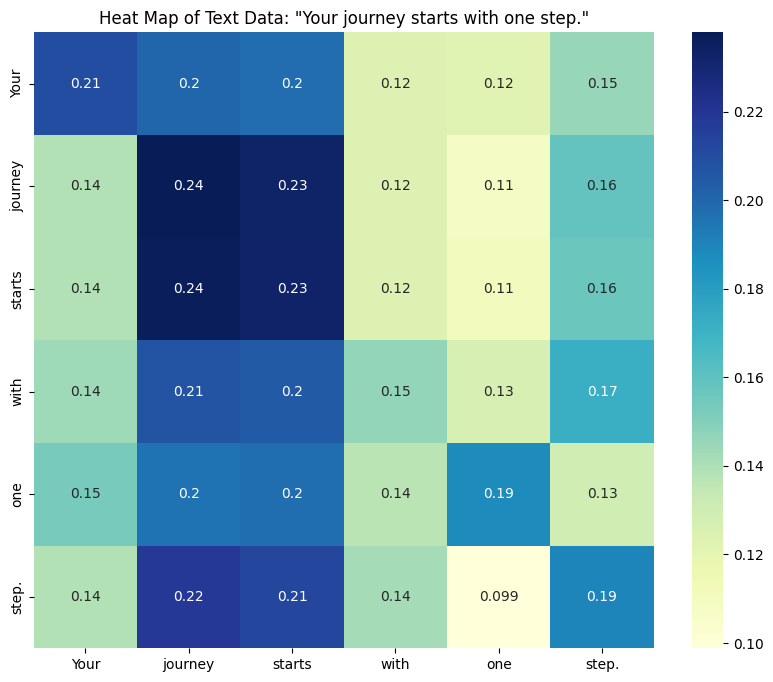

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tokens = "Your journey starts with one step.".split() 

plt.figure(figsize=(10, 8))
sns.heatmap(atten_weights, annot=True, cbar=True,  cmap='YlGnBu',
            xticklabels=tokens, yticklabels=tokens)
# Add title
plt.title('Heat Map of Text Data: "Your journey starts with one step."')

# Show the plot
plt.show()


# 3- Compute context vectors.

In [17]:
all_context_vectors = atten_weights @ inputs 
all_context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])